## Observations and Insights 

- For the mice that received Capomulin treatment there seems to be a strong positive correlation of 0.88 between average weight and average tumor volume (mm3). This depicts that an increase in average weight also reflects an increase in average tumor volume (mm3). This is true because the regression line displays this positive correlation and how the datapoints deviate from it.
- Looking at the 5 number summary (Box Plot) mice that were treated with infubinol and ceftamin had an higher median of tumor volume of roughly 60 mm3. Whereas mice that were treated with Capomulin and Ramicane displayed lower median tumor volume between a range of 36 to 39 mm3. However, there was an instance of a mouse treated with Ramicane and displayed symptoms of lower tumor volume of 35 mm3.
- The overall IQR of Capomulin and Ramicane range was in the lower tumor volume (mm3) whereas ceftamin and infubinol were placed in higher tumor volume (mm3). Ceftamin had the largest IQR out of the 4 box plots. Also the full range for Capomulin and Ramicane never extended into ceftamin and infubinol full range. 

In [30]:
# Dependencies and Setup.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
mouse_data['Mouse ID'].count()

1893

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data.duplicated(subset = ['Mouse ID','Timepoint']).sum()

5

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data[['Mouse ID','Timepoint']].duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_data = mouse_data.drop_duplicates(keep = "first", subset = ['Mouse ID', 'Timepoint'])

In [35]:
# Checking the number of mice in the clean DataFrame.
new_mouse_data['Mouse ID'].count()

1888

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Statistics_TV = pd.DataFrame({'Mean':new_mouse_data['Tumor Volume (mm3)'].mean(),
             'Median':new_mouse_data['Tumor Volume (mm3)'].median(),
             'Standard Deviation':new_mouse_data['Tumor Volume (mm3)'].std(),
             'SEM (Standard Error of Mean)':new_mouse_data['Tumor Volume (mm3)'].sem(),}, index = [0])

Summary_Statistics_TV

,Mean,Median,Standard Deviation,SEM (Standard Error of Mean)
0,50.449276,48.951421,8.904565,0.204933


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen.
# This method produces everything in a single groupby function.
Drug_Regimen_Groupby = new_mouse_data.groupby("Drug Regimen")

mean = Drug_Regimen_Groupby['Tumor Volume (mm3)'].mean()
median = Drug_Regimen_Groupby['Tumor Volume (mm3)'].median()
std_dev = Drug_Regimen_Groupby['Tumor Volume (mm3)'].std()
std_err_m = Drug_Regimen_Groupby['Tumor Volume (mm3)'].sem()

#Added values into Dataframe.
Summary_Statistics_TV_Groupby = pd.DataFrame({'Mean': mean, 
                                              'Median': median, 
                                              'Standard Deviation': std_dev, 
                                              'SEM (Standard Error of Mean)':std_err_m})

Summary_Statistics_TV_Groupby

,Mean,Median,Standard Deviation,SEM (Standard Error of Mean)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

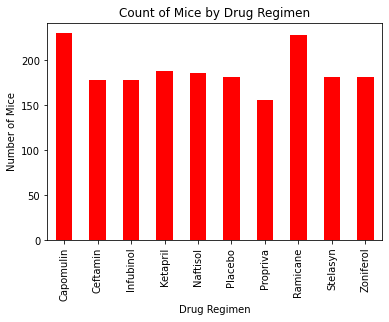

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#Used groupby then plotted the groupby dataframe using pandas plot.
new_mouse_data_groupby = new_mouse_data.groupby('Drug Regimen').count()['Mouse ID']
new_mouse_data_groupby.plot(kind = 'bar', color = 'red')

#Labels:
plt.title('Count of Mice by Drug Regimen')
plt.ylabel('Number of Mice')

plt.show()

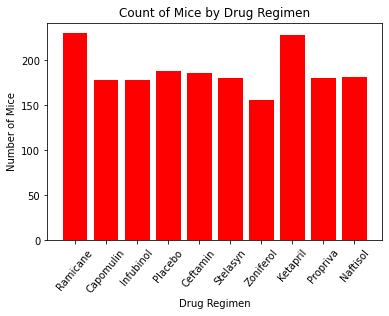

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Found all the unique 'Drug Regimens' then used numpy function 'arange' to find the length.
#Used a groupby from original dataframe to get all the 'Mouse ID' by 'Drug Regimen'.
#Then used groupby 'Drug Regimen' and counted the mice based off each category and set y-values.
x_ticks = new_mouse_data['Drug Regimen'].unique()
x_val = np.arange(0, len(new_mouse_data['Drug Regimen'].unique()))
y_val = new_mouse_data.groupby('Drug Regimen')['Mouse ID'].count()

#Labels:
plt.bar(x_val, y_val, color = 'Red')
plt.title('Count of Mice by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

#Used x_val as variable for the ticks and x_ticks as labels which were pulled from dataframe.
plt.xticks(ticks = x_val, labels = x_ticks , rotation = 50)

plt.show()

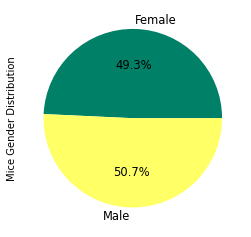

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
new_mouse_data_groupby = new_mouse_data.groupby('Sex').count()['Mouse ID']
new_mouse_data_groupby.plot(kind = 'pie', figsize = (4,8), autopct = '%1.1f%%' , 
                            fontsize = 11.5, colormap = 'summer')
plt.ylabel("Mice Gender Distribution")
plt.show()

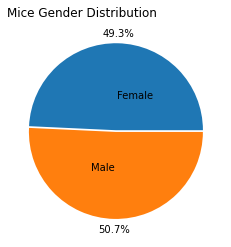

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.01, 0.01)
plt.pie(new_mouse_data_groupby, labels = ["Female", 'Male'], explode = explode, 
        autopct = '%1.1f%%', radius = 1, labeldistance = 0.4, pctdistance = 1.12, )
plt.title("Mice Gender Distribution", loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumorMax = new_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()\
.merge(new_mouse_data,on=['Mouse ID','Timepoint'],how='left')
tumorMax.head()

Capomulin = tumorMax.loc[tumorMax['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Ramicane = tumorMax.loc[tumorMax['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol = tumorMax.loc[tumorMax['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin = tumorMax.loc[tumorMax['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


#Calculated the 5 summary statistics for the 4 drug regimens:
Capomulin_Quartile = Capomulin.quantile([0.25,0.5,0.75])
Cap_lowerq = Capomulin_Quartile[0.25]
Cap_higherq = Capomulin_Quartile[0.75]
Cap_IQR = Cap_higherq - Cap_lowerq
Cap_lowerbound = Cap_lowerq - (1.5 * Cap_IQR)
Cap_higherbound = Cap_higherq + (1.5 * Cap_IQR)
print(f"Capomulin potential outliers: {Capomulin.loc[(Capomulin < Cap_lowerbound)]}")

Ramicane_Quartile = Ramicane.quantile([0.25,0.5,0.75])
Ram_lowerq = Ramicane_Quartile[0.25]
Ram_higherq = Ramicane_Quartile[0.75]
Ram_IQR = Ram_higherq - Ram_lowerq
Ram_lowerbound = Ram_lowerq - (1.5 * Ram_IQR)
Ram_higherbound = Ram_higherq + (1.5 * Ram_IQR)
print(f"Ramicane potential outliers: {Ramicane.loc[(Ramicane < Ram_lowerbound)]}")

Infubinol_Quartile = Infubinol.quantile([0.25,0.5,0.75])
Inf_lowerq = Infubinol_Quartile[0.25]
Inf_higherq = Infubinol_Quartile[0.75]
Inf_IQR = Inf_higherq - Inf_lowerq
Inf_lowerbound = Inf_lowerq - (1.5 * Inf_IQR)
Inf_higherbound = Inf_higherq + (1.5 * Inf_IQR)
print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < Inf_lowerbound)]}")

Ceftamin_Quartile = Ceftamin.quantile([0.25,0.5,0.75])
Cef_lowerq = Ceftamin_Quartile[0.25]
Cef_higherq = Ceftamin_Quartile[0.75]
Cef_IQR = Cef_higherq - Cef_lowerq
Cef_lowerbound = Cef_lowerq - (1.5 * Cef_IQR)
Cef_higherbound = Cef_higherq + (1.5 * Cef_IQR)
print(f"Ceftamin potential outliers: {Ceftamin.loc[(Ceftamin < Cef_lowerbound)]}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


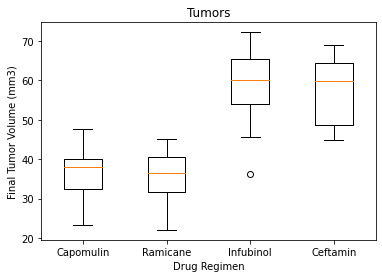

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Created list of treatments.
treatment_list = [Capomulin, Ramicane, Infubinol, Ceftamin]

#made sublplots to display multiple plots on one figure.
fig1, ax1 = plt.subplots()

#Labels:
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#Created and added boxplots
plt.boxplot(treatment_list, labels = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

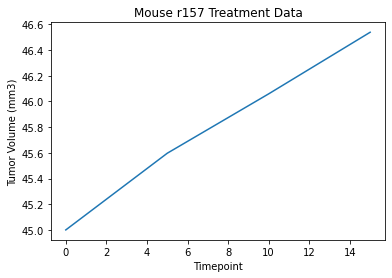

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Got the two variables and stored into dataframe then located all the mice that had Capomulin. 
#Again located specific mouse 'r157' and got all the data for that mouse.
df = new_mouse_data[['Timepoint','Tumor Volume (mm3)', 'Drug Regimen','Mouse ID']]
Capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin',:]
r157_data = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 'r157',:]

#Plotted the mouse timepoint and tumor volume (mm3).
plt.plot(r157_data['Timepoint'], r157_data['Tumor Volume (mm3)'])

#Labels:
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse r157 Treatment Data")

plt.show()

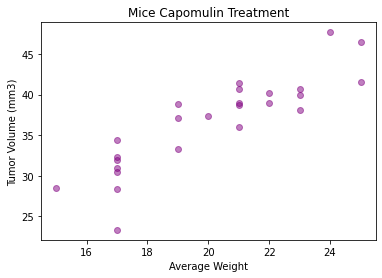

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# plt.scatter(r157_data['Timepoint'], r157_data['Tumor Volume (mm3)'])

#Used 'tumorMax' dataframe from previous to find all the mice treated with Capomulin.
#Grouped them by 'Mouse ID' and found the mean for each datapoint column.
Capomulin = tumorMax.loc[tumorMax['Drug Regimen'] == 'Capomulin']
Capomulin_average= Capomulin.groupby(['Mouse ID']).mean()

#Plotted variables into a scatter plot
plt.scatter(Capomulin_average['Weight (g)'], Capomulin_average['Tumor Volume (mm3)'], color = 'purple', alpha = 0.5)

#Labels:
plt.xlabel('Average Weight')
plt.title('Mice Capomulin Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

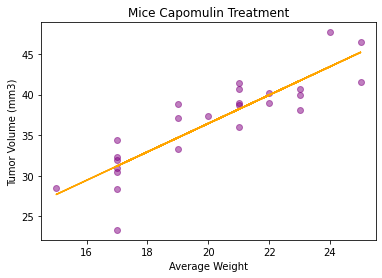

Correlation Coeffecient: 0.88
Slope: 1.75
Y-Intercept: 1.45
R-value: 0.88
P-value: 9.0844290886732e-09
Standard Deviation: 0.2


In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Found correlation coefficient using 'pearsonr' sklearn function and [0] indexed to pull the correlation.
correlation_coefficient = st.pearsonr(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])[0]

#Used sklearn 'linregress' function to get the linear regression model values and unpacked values using tuple.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])

#Calculated regression line using y=mx+b formula.
y = slope * Capomulin_average['Weight (g)'] + intercept

#Plotted original scatter plot and then plotted regression line in the same figure.
plt.scatter(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'], color = 'purple', alpha = 0.5)
plt.plot(Capomulin_average['Weight (g)'], y, color = 'Orange')

#Labels:
plt.xlabel('Average Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mice Capomulin Treatment')

plt.show()

#Printed all the necessary values for reference:
print(f"Correlation Coeffecient: {round(correlation_coefficient, 2)}")
print(f"Slope: {round(slope, 2)}")
print(f"Y-Intercept: {round(intercept, 2)}")
print(f"R-value: {round(rvalue, 2)}")
print(f"P-value: {pvalue}")
print(f"Standard Deviation: {round(stderr, 2)}")